In [1]:
import numpy as np
from skimage import io, data, transform, util, filters, color
import matplotlib.pyplot as plt
from skimage.util import img_as_float, img_as_float64, img_as_ubyte
from scipy import ndimage, fft

In [10]:
def log_imshow(img):
    return np.log( np.abs(img)+1 )

# Filtro passa-baixas

In [2]:
def mesh(img):
    lin, col = img.shape
    x, y = np.ogrid[0:lin, 0:col]
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection='3d')
    #ax.plot_surface(x,y,img, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
    ax.plot_wireframe(x,y,img, rstride=10, cstride=10)


In [3]:
x = np.array([2,3,4])
y = np.array([5,6])
u,v = np.meshgrid(x,y)
print(u)
print(v)

[[2 3 4]
 [2 3 4]]
[[5 5 5]
 [6 6 6]]


In [4]:
def gridFourier(M, N):
    u = np.arange(0, M)
    v = np.arange(0, N)
 
    u = u - np.floor(M/2)
    v = v - np.floor(N/2)
    U, V = np.meshgrid(u, v)
    return U, V


### Máscara passa-baixas ideal

$$D(u,v) = \sqrt{  ( u - P/2)^2 + ( v - Q/2)^2 }$$
$$H(u,v) = \begin{dcases} 1 & \text{se } D(u,v) \leq D_0 \\ 0 & \text{se } D(u,v) > D_0\end{dcases}$$

In [5]:
def mask_ideal(width, height, d0):
    U, V = gridFourier(width, height)
    D = np.sqrt(U**2 + V**2)
    H = D <= d0
    return H

### Máscara passa-baixas Butterworth
$$H(u,v) = \frac{1}{1 + (D(u,v)/D_0)^{2n}}$$

In [6]:
def mask_butterworth(width, height, d0, n):
    U, V = gridFourier(width, height)
    D = np.sqrt(U**2 + V**2)
    H = 1 / (1 + (D/d0)**(2*n))
    return H

### Máscara passa-baixas Gaussiano
$$H(u,v) = e^{- \frac{D^2(u,v)}{2\sigma^2} }$$

In [7]:
def mask_gaussiana(width, height, sigma):
    U, V = gridFourier(width, height)
    D = np.sqrt(U**2 + V**2)
    H = np.exp( -D**2/(2*sigma**2)  )
    return H

### Filtragem

In [8]:
def passa_freq(img, mask):
    height, width = img.shape[:2]
    fimg = fft.fftshift( fft.fft2(img) )
    fimg = fimg * mask
    nimg = fft.ifft2(fimg)
    return nimg, fimg

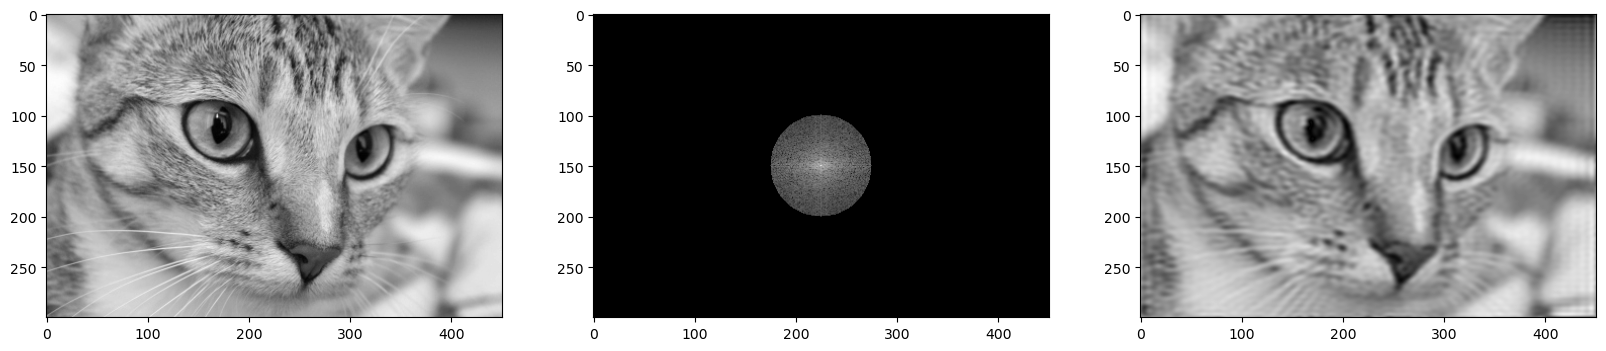

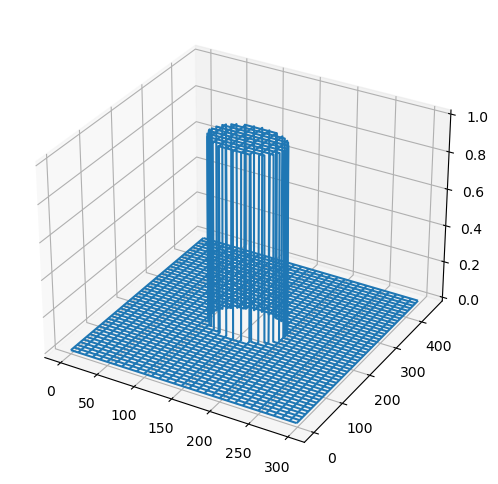

In [13]:
img = data.chelsea()
img = color.rgb2gray(img)

mask = mask_ideal(img.shape[1], img.shape[0], 50)
#mask = mask_butterworth(img.shape[1], img.shape[0], 90, 2)
#mask = mask_gaussiana(img.shape[1], img.shape[0], 50)

nimg, fimg = passa_freq(img, mask)

f, ax = plt.subplots(1,3,figsize=(20,8))
ax[0].imshow(img, cmap='gray')
ax[1].imshow(log_imshow(fimg), cmap='gray')	
ax[2].imshow(np.abs(nimg), cmap='gray')	

mesh(mask)

## Filtragem passa-altas

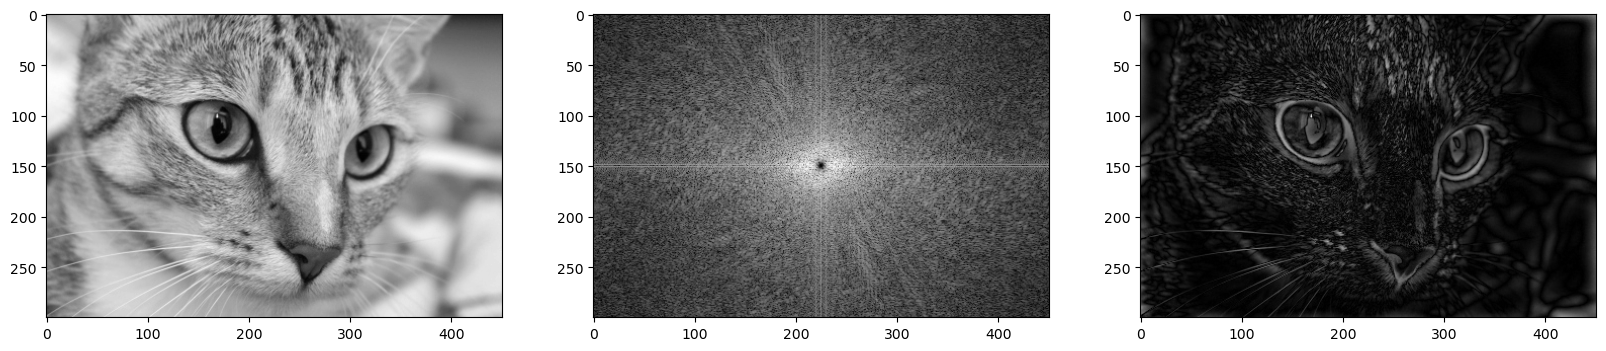

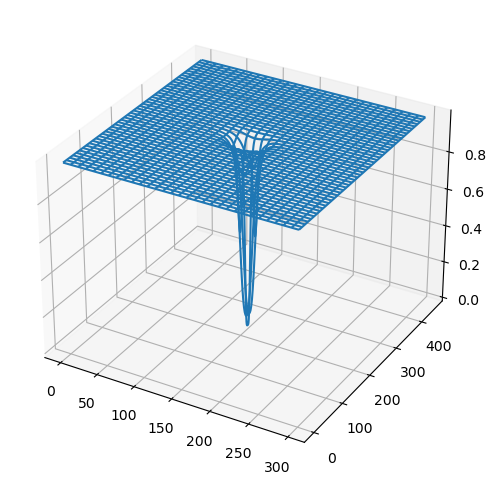

In [14]:
img = data.chelsea()
img = color.rgb2gray(img)

#mask = mask_ideal(img.shape[1], img.shape[0], 100)
mask = mask_butterworth(img.shape[1], img.shape[0], 10, 2)
#mask = mask_gaussiana(img.shape[1], img.shape[0], 150)

nimg, fimg = passa_freq(img, 1-mask)

f, ax = plt.subplots(1,3,figsize=(20,8))
ax[0].imshow(img, cmap='gray')
ax[1].imshow(log_imshow(fimg), cmap='gray')	
ax[2].imshow(np.abs(nimg), cmap='gray')	

mesh(1-mask)